### Glass Identification Dataset

#### Problem Statement:
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!



The chemical compositions are measured as the weight percent in corresponding oxide.

#### Attribute Information-

 Id number: 1 to 214
 RI: refractive index
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
Mg: Magnesium
Al: Aluminum
Si: Silicon
K: Potassium
Ca: Calcium
Ba: Barium
Fe: Iron
Type of glass: (class attribute)
1- building_windows_float_processed
2- building_windows_non_float_processed
3- vehicle_windows_float_processed
4- vehicle_windows_non_float_processed (none in this database)
5- containers
6- tableware
7- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 


#### Predict : Type of glass

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("glass.csv",header = None)
df

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df_desc=pd.DataFrame(df)
df_desc.columns= ["Id",'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe','Type']
df_desc

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


### 1. Identification of variables and data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


All columns are in float datatype.

Target column is in integer datatype.

Column "ID number" does not contribute to the output.

### 2. Analyzing the basic metrics

In [5]:
df.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


The data does not have much skewness, mean and median are almost the same except in the columns "Barium" and "Magnesium".

Difference between quantiles shows that the spread is low and outliers are also less.

### 3. Non-Graphical Univariate Analysis

In [6]:
df.skew()

Id      0.000000
RI      1.625431
Na      0.454181
Mg     -1.152559
Al      0.907290
Si     -0.730447
K       6.551648
Ca      2.047054
Ba      3.416425
Fe      1.754327
Type    1.114915
dtype: float64

Columns "Potassium", "Barium" and "Calcium" have high skewness. We will remove the skewness of those columns during variable treamtment.

### 4. Checking for missing values and duplicates from dataframe

In [7]:
# checking for duplicate values
df.duplicated().sum()

0

No duplicate values are present.

In [8]:
# checking for empty spaces
df.isin(['NAN','NA','N/A','-',' ','?',np.nan]).sum().any()

False

No empty spaces are present in the data

In [9]:
#checking for null values
df.isnull().sum()

Id      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

No null values present in the data

### 5. Graphical Univariate Analysis

In [10]:
#Setting the display for our graph display

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams ['figure.figsize'] = (10, 7)
plt.rcParams ['figure.facecolor'] = '#FFE5B4'

<AxesSubplot:xlabel='Type', ylabel='count'>

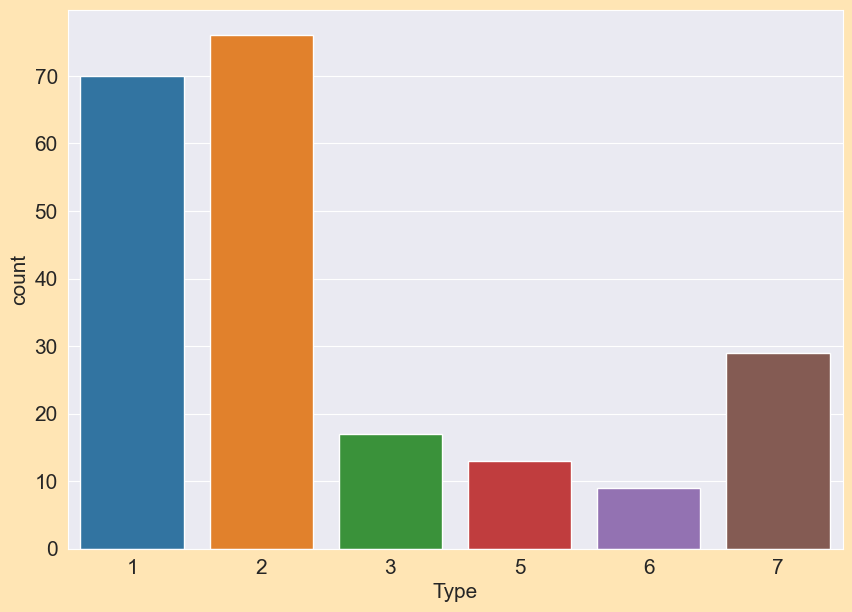

In [11]:
# Analysing the target data
df["Type"].value_counts()
sns.countplot(df["Type"])

There are total 6 types of glasses in the data.

Most common type of glass in the data is type 1 and 2.

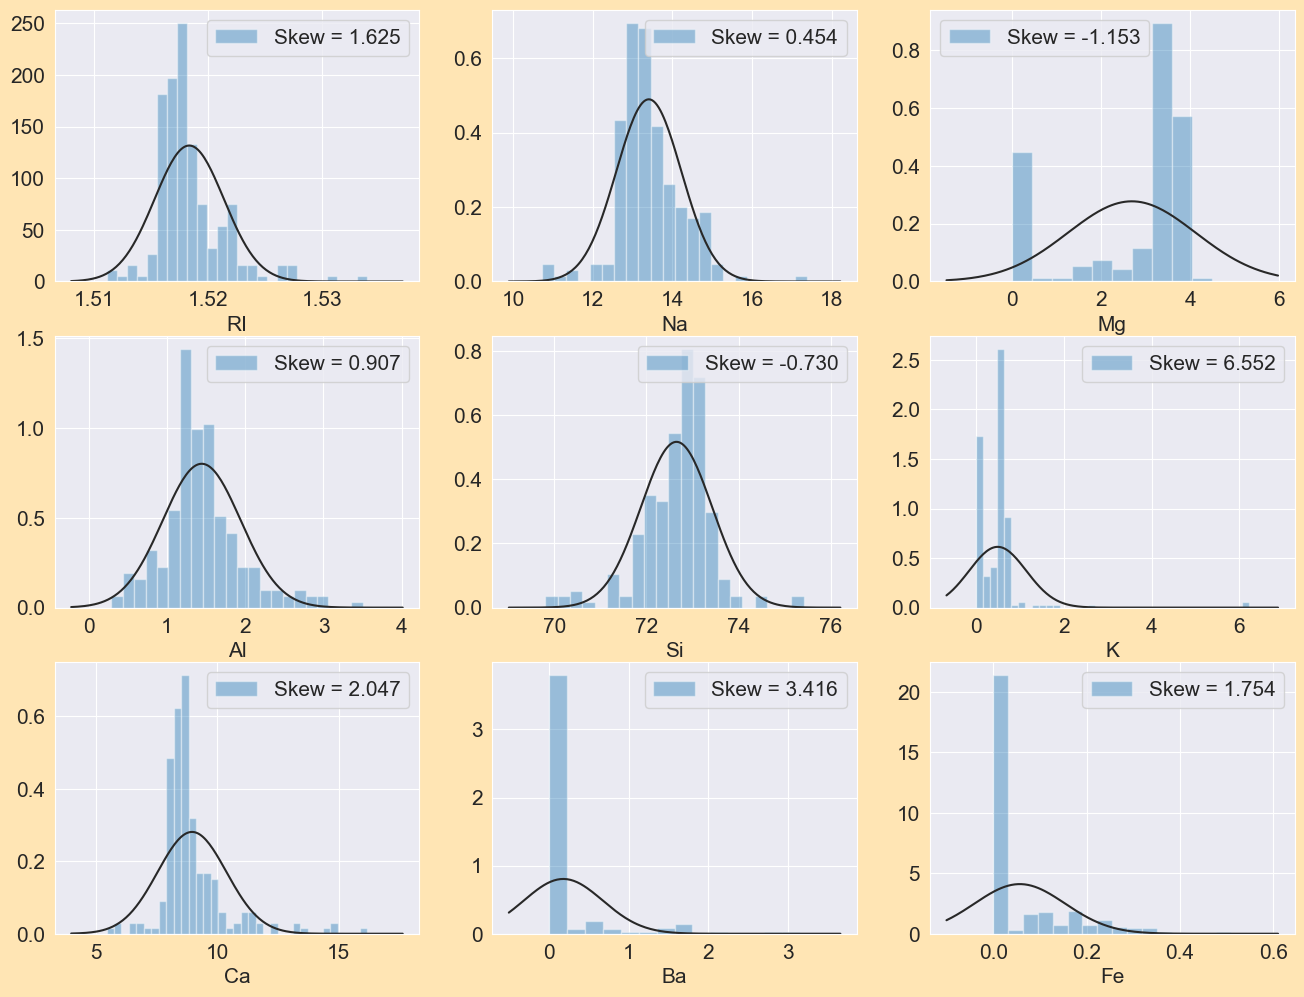

In [12]:
#plotting a histogram of each independent feature for visualization
cols = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
fig,ax = plt.subplots(3,3, figsize=(16, 12))
ax = ax.flatten()
i = 0
for col in cols:
    skew = df[col].skew()
    sns.distplot(df[col], ax = ax[i], fit= stats.norm, kde=False, label='Skew = %.3f' %(skew))
    ax[i].legend(loc='best')
    i += 1
plt.show()

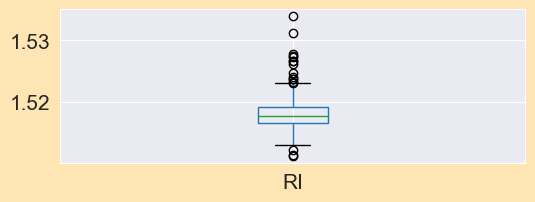

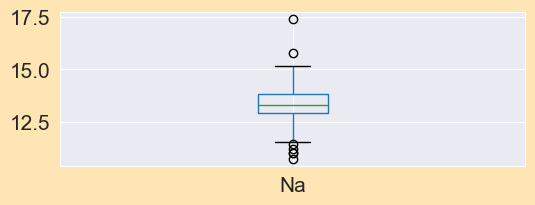

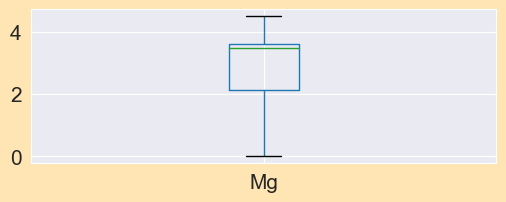

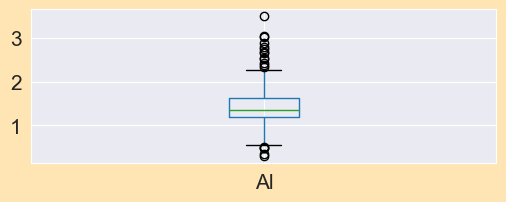

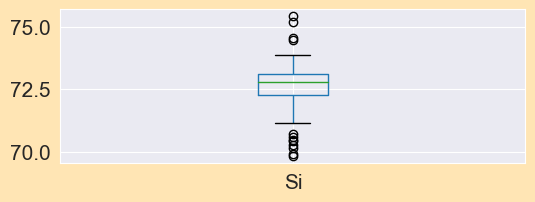

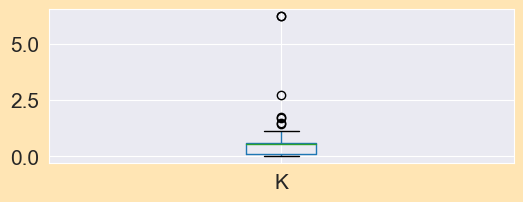

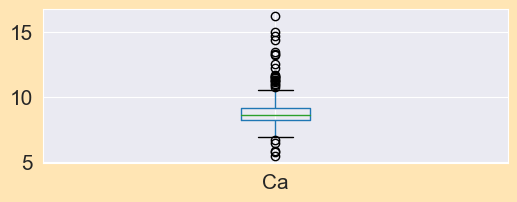

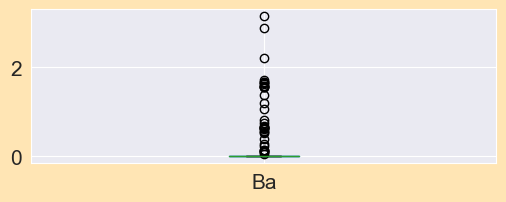

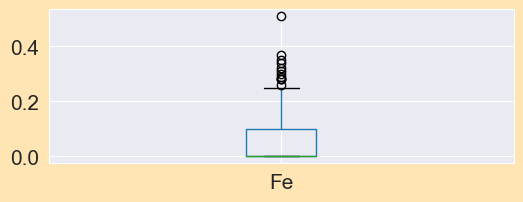

In [13]:
# to check for outliers
for column in df.iloc[:,1:-1]:
    plt.figure(figsize=(6,2))
    df.boxplot([column])

We can infer from here that there are a lot of outliers present in the dataset.

### 6. Multivariate Analysis

In [14]:
df.columns

Index(['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

### 7. Encoding the categorical Data

There is no categorical data in columns so no need of encoding.

### 8. Outlier treatment

In [15]:
z=np.abs(zscore(df))
dfn=df[(z<3).all(axis=1)]
dfn

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
208,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


In [16]:
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


214-194=20. So less than 10% data removed as outliers which is acceptable.

### 9. Variable transformations and multicollinearity

In [17]:
#Checking skewness
dfn.skew()

Id      0.107537
RI      0.952733
Na      0.371482
Mg     -1.528849
Al      0.658259
Si     -0.425450
K       0.303175
Ca      1.077962
Ba      3.188587
Fe      1.486479
Type    1.284007
dtype: float64

In [18]:
#Treating multicolinearity
dfn["Ba"]=stats.boxcox(dfn["Ba"],0.5)
dfn["Fe"]=stats.boxcox(dfn["Fe"],1)
dfn["Mg"]=stats.boxcox(dfn["Mg"],0.5)

In [19]:
dfn.skew()

Id      0.107537
RI      0.952733
Na      0.371482
Mg     -1.798777
Al      0.658259
Si     -0.425450
K       0.303175
Ca      1.077962
Ba      2.465013
Fe      1.486479
Type    1.284007
dtype: float64

<AxesSubplot:>

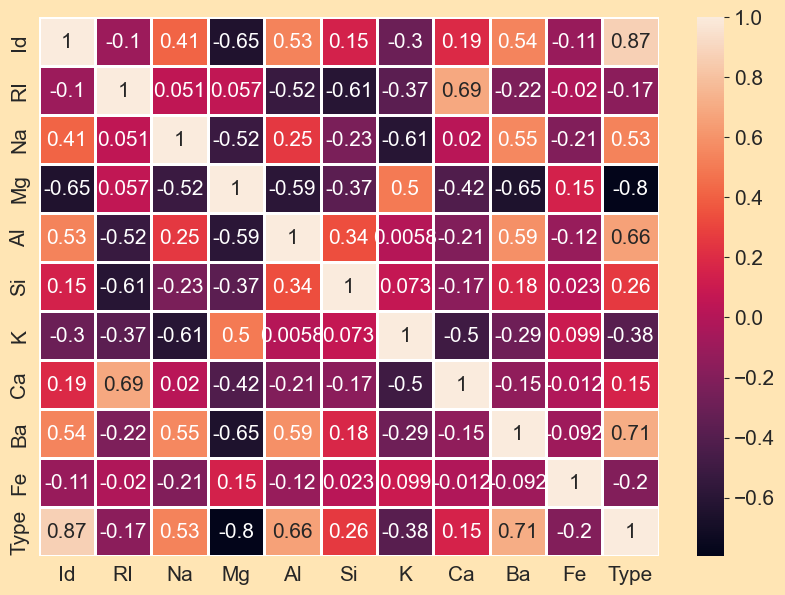

In [20]:
# To find multicolinearity
dfc=dfn.corr()
sns.heatmap(dfc, annot= True, linewidths=0.75)

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(dfn.iloc[:,1:-1].values,i) for i in range(dfn.iloc[:,1:-1].shape[1])]
vif["features"]=dfn.iloc[:,1:-1].columns
print(vif)

      VIF Factor features
0  143926.388751       RI
1    3748.495359       Na
2      47.153265       Mg
3      42.430872       Al
4   82370.832090       Si
5      13.003387        K
6    1381.080592       Ca
7      38.455518       Ba
8     131.565306       Fe


There are 9 independent features out of which some are correlated and only 214 observations, 

As the number of columns is quite low, we used Principal Component Analysis to prevent the data from overfitting and also reducing multicollinearity.

In [22]:
# Reducing the dimensionality of our dataset using PCA
pca = PCA()
pca.fit(dfn.iloc[:,1:-1])

PCA()

In [23]:
#To find the variance explained by different components
pd.DataFrame(pca.explained_variance_.round(2), index=["P" + str(i) for i in range(1,10)], columns=["Explained Variance"]).T

,P1,P2,P3,P4,P5,P6,P7,P8,P9
Explained Variance,2.43,1.03,0.51,0.15,0.11,0.04,0.01,0.01,0.0


In [24]:
# Since, first three components explain 90% of the total variation in the dataset, we choose them as our Principal Components.
pca = PCA(n_components = 3)
df_pca = pca.fit_transform(dfn.iloc[:,1:-1])

### 11. Dimensionality Reduction

#### Dimensionality Reduction-- testing using ANOVA

In [25]:
a=[]
for i in dfn.columns:
    for j in dfn.columns:
        try:
            F, p = stats.f_oneway(dfn[f'{j}'],dfn[f'{i}'])
           # print(f"relation of {j} with {i}","\n","F =",F,"p=",p)
            if p>0.05 and p!=1:
                a.append(f"relation of {j} with {i} F = {F} and p= {p}")
        except:
            F, p = stats.f_oneway(dfn[{j}],dfn[{i}])
            if p>0.05 and p!=1:
                a.append(f"relation of {j} with {i} F = {F} and p= {p}")
            
            #print(f"relation of {j} with {i}","\n","F =",F,"p=",p)
    
            
a

[]

No columns have relational value of p more than 0.05, so ANOVA test is passed.

### 12. Resampling using SMOTE

1    70
2    70
3    70
5    70
6    70
7    70
Name: Type, dtype: int64


<AxesSubplot:xlabel='Type', ylabel='count'>

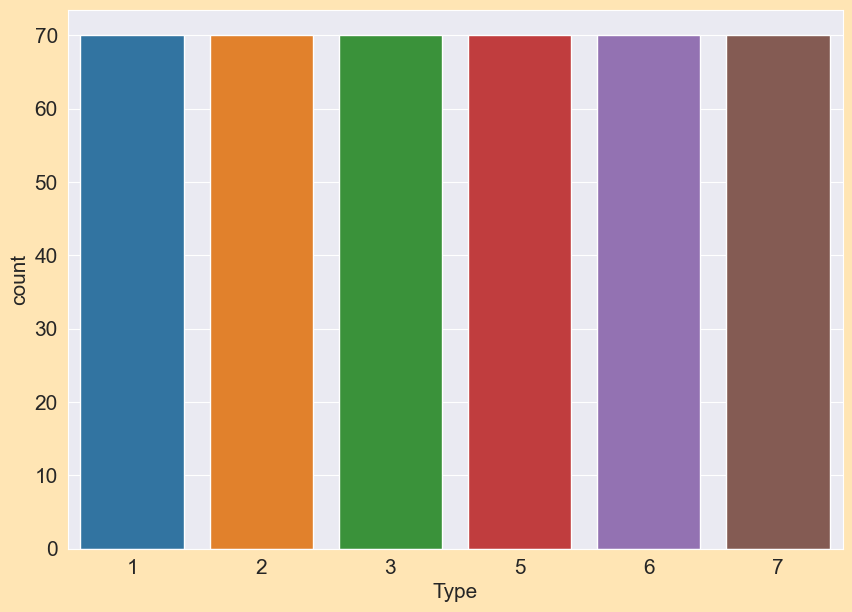

In [26]:
#Oversampling the data
dfy=dfn["Type"]
dfx=dfn.iloc[:,1:-1]
smt=SMOTE()
trainx, trainy=smt.fit_resample(dfx,dfy)
print(trainy.value_counts())
sns.countplot(trainy)

In [27]:
trainx

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.521010,13.640000,2.237924,1.100000,71.780000,0.060000,8.750000,-2.000000,-1.000000
1,1.517610,13.890000,1.794733,1.360000,72.730000,0.480000,7.830000,-2.000000,-1.000000
2,1.516180,13.530000,1.768289,1.540000,72.990000,0.390000,7.780000,-2.000000,-1.000000
3,1.517660,13.210000,1.841875,1.290000,72.610000,0.570000,8.220000,-2.000000,-1.000000
4,1.517420,13.270000,1.805260,1.240000,73.080000,0.550000,8.070000,-2.000000,-1.000000
...,...,...,...,...,...,...,...,...,...
415,1.515393,14.211469,-2.000000,2.620346,73.142959,0.073045,9.189049,-0.333910,-0.996695
416,1.522624,13.537003,1.650279,1.339128,72.255440,0.694798,8.494899,-1.718534,-1.000000
417,1.519604,13.928559,-0.265027,2.023252,72.626906,0.284800,9.155706,-1.227922,-1.000000
418,1.516060,14.502528,-2.000000,2.537472,73.168922,0.024684,9.030223,-0.390501,-1.000000


In [28]:
# Reducing the dimensionality of our dataset using PCA
pca = PCA()
pca.fit(trainx)
pca = PCA(n_components = 3)
trainx_pca = pca.fit_transform(trainx)

### 13.Scaling of Independent features

In [29]:
X=trainx_pca
Y=trainy
st=StandardScaler()
x=st.fit_transform(X)
Xf=pd.DataFrame(data=x)

### 14. Machine Learning

#### Preparing data for modelling

In [30]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
415    7
416    7
417    7
418    7
419    7
Name: Type, Length: 420, dtype: int64

In [31]:
# Split 80-20 train vs test data
train_x,test_x,train_y,test_y=train_test_split(Xf,Y,test_size=0.2,random_state=15)

In [32]:
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(336, 3) (336,)
(84, 3) (84,)


#### Training and testing of data

In [33]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

accuracy score for  LogisticRegression() is :  0.6547619047619048 
 [[ 4 10  3  0  0  0]
 [ 1  4  3  0  2  0]
 [ 0  8  6  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0 11  2]
 [ 0  0  0  0  0 16]] 
               precision    recall  f1-score   support

           1       0.80      0.24      0.36        17
           2       0.18      0.40      0.25        10
           3       0.50      0.43      0.46        14
           5       1.00      1.00      1.00        14
           6       0.85      0.85      0.85        13
           7       0.89      1.00      0.94        16

    accuracy                           0.65        84
   macro avg       0.70      0.65      0.64        84
weighted avg       0.73      0.65      0.66        84
 

Cross Validation Score is : [0.66176471 0.76119403 0.68656716 0.70149254 0.76119403]
Mean Score : 0.7144424934152767


accuracy score for  GaussianNB() is :  0.7738095238095238 
 [[ 5  4  8  0  0  0]
 [ 2  6  0  1  1  0]
 [ 1  0 13  0  0  0]
 [ 0  0  0 14  0

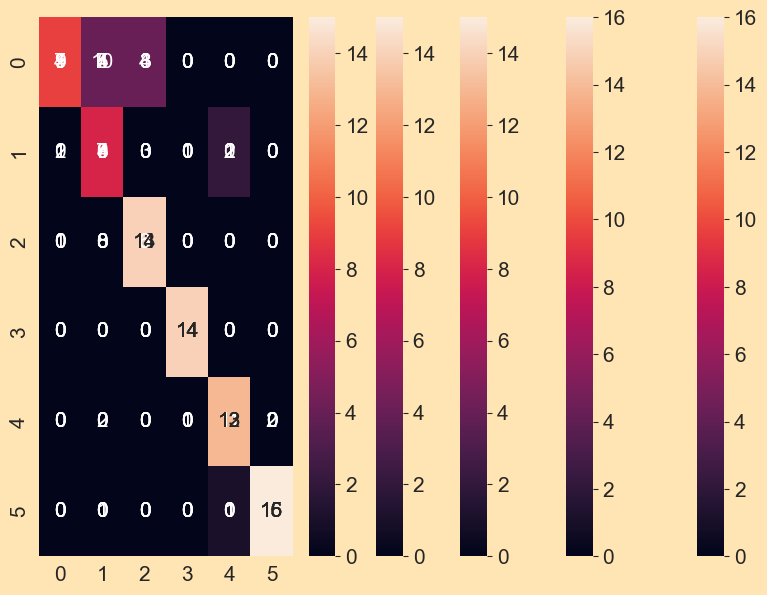

In [34]:
model=[lg,gnb,svc,dtc,knn]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print("accuracy score for ",m,"is : ",accuracy_score(test_y,predm),"\n",confusion_matrix(test_y,predm),"\n",classification_report(test_y,predm),"\n")
    sns.heatmap(confusion_matrix(test_y,predm),annot=True)
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("==============================================\n\n\n====================================================")

###### Accuracy score for  DecisionTreeClassifier() is : 0.8690476190476191   But best cross validation score is for SVC

We can infer that SVC shows the best results. So we will proceed with SVC.

#### Hyperparameter tuning

In [35]:
ran=[]
for i in range(50):
    ran.append(i)
from sklearn.model_selection import GridSearchCV
dict1={"kernel":["poly","rbf","linear"],"C":[1,2,3,4,5]}
gv=GridSearchCV(estimator=svc,param_grid=dict1,cv=5, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'C': 4, 'kernel': 'rbf'}

In [36]:
svc_n=SVC(kernel= 'linear') # default value for C is 1
svc_n.fit(train_x,train_y)
svc_n.score(train_x,train_y)
predm=svc_n.predict(test_x)
print("accuracy score for ",svc_n,"is : ",accuracy_score(test_y,predm),"\n",confusion_matrix(test_y,predm),"\n",classification_report(test_y,predm),"\n")
score=cross_val_score(m,train_x,train_y,cv=5)
print("Cross Validation Score is :",score)
print("Mean Score :",score.mean())

accuracy score for  SVC(kernel='linear') is :  0.6547619047619048 
 [[ 2 11  4  0  0  0]
 [ 0  5  3  0  2  0]
 [ 0  8  6  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0 13  0]
 [ 0  0  0  0  1 15]] 
               precision    recall  f1-score   support

           1       1.00      0.12      0.21        17
           2       0.21      0.50      0.29        10
           3       0.46      0.43      0.44        14
           5       1.00      1.00      1.00        14
           6       0.81      1.00      0.90        13
           7       1.00      0.94      0.97        16

    accuracy                           0.65        84
   macro avg       0.75      0.66      0.64        84
weighted avg       0.79      0.65      0.64        84
 

Cross Validation Score is : [0.77941176 0.74626866 0.79104478 0.76119403 0.80597015]
Mean Score : 0.7767778753292361


In [37]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
ran=[]
for i in range(30):
    ran.append(i)
    
dict2={"random_state":ran,'criterion':['gini', 'entropy', 'log_loss'],"min_samples_split":[1,2,3,4,5,6]}
gv=GridSearchCV(rf,dict2, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'criterion': 'entropy', 'min_samples_split': 2, 'random_state': 2}

In [38]:
rf1=RandomForestClassifier(criterion='entropy', min_samples_split= 2, random_state= 13)
rf1.fit(train_x,train_y)
prf=rf1.predict(test_x)
print(accuracy_score(test_y,prf))
score=cross_val_score(m,train_x,train_y,cv=5)
print("Cross Validation Score is :",score)
print("Mean Score :",score.mean())

0.8809523809523809
Cross Validation Score is : [0.77941176 0.74626866 0.79104478 0.76119403 0.80597015]
Mean Score : 0.7767778753292361


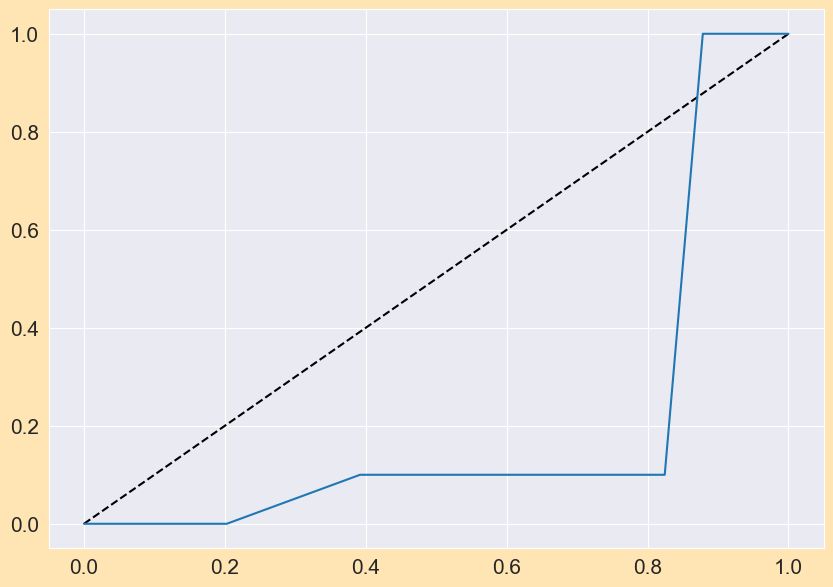

In [39]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds=metrics.roc_curve(test_y,prf,pos_label=2)
#fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr)

In [40]:
import joblib
joblib.dump(rf1,"glass_rfc.obj")

['glass_rfc.obj']

In [41]:
rfr=joblib.load('glass_rfc.obj')

In [42]:
result=rfr.predict(test_x)

In [43]:
print(accuracy_score(test_y,result))

0.8809523809523809
